Total Glomeruli detected in this tile: 19
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... 18. nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


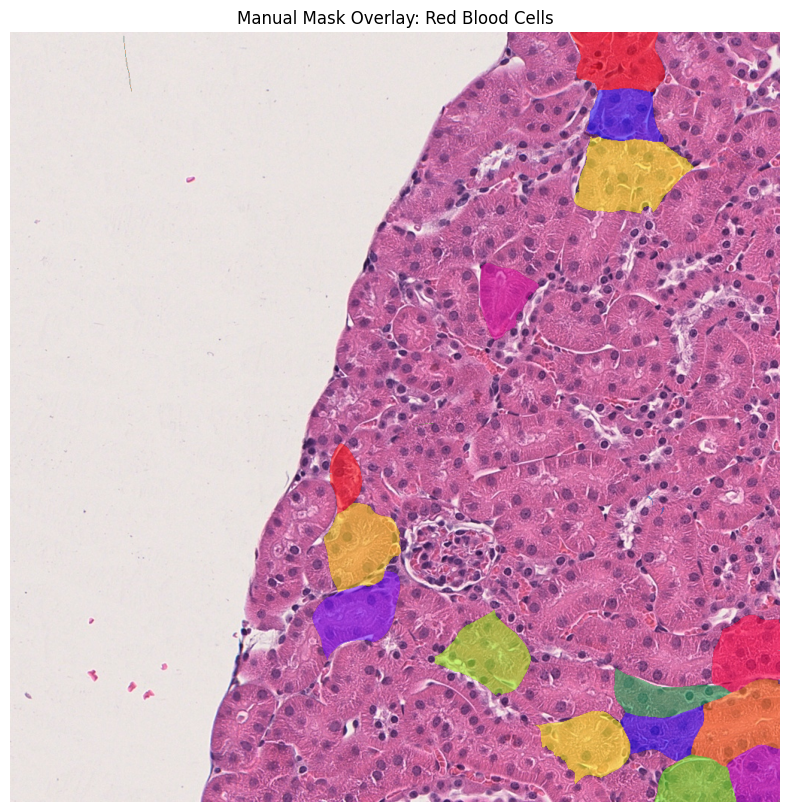

In [10]:
import numpy as np
from cellpose import models, plot
import matplotlib.pyplot as plt
from skimage import io # Using skimage for stable loading

# 1. Load the original RGB image
img_path = '/Users/edmundtsou/Desktop/JEFworks/jefworks-structure_segmentation/glomeruli_pipeline/glomeruli_tiles/OTS-24-22043 - 2024-08-28 14.58.03/OTS-24-22043 - 2024-08-28 14.58.03-8133-23239.jpg'
img = io.imread(img_path)

# 2. Define Channels for RBCs
# [1, 0] means: Search the RED channel (1) for cells, ignore SECOND channel (0)
channels = [1, 2]

# 3. Tuning Parameters for Clustered RBCs
flow_threshold = 0.4       # Higher = more aggressive splitting of clusters
cellprob_threshold = -1  # Lower = more sensitive to faint RBC edges
diameter = 80             # Typical RBC size in pixels at this resolution

model = models.CellposeModel(model_type='cyto3')

# 4. Run Evaluation
# Pass the ORIGINAL img, not a sliced version
masks, flows, styles = model.eval(
    img, 
    batch_size=32, 
    channels=channels,
    diameter=diameter,
    flow_threshold=flow_threshold, 
    cellprob_threshold=cellprob_threshold,
    normalize=True # standard normalization is usually better than blocksize=0
)

num_masks = len(np.unique(masks)) - 1

print(f"Total Glomeruli detected in this tile: {num_masks}")

# 5. Visualize
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a figure
plt.figure(figsize=(10, 10))

# 2. Display the original image first
plt.imshow(img)

# 3. Create a masked version of the masks for transparency
# We set background (0) to NaN so it's invisible
render_masks = masks.astype(float)
render_masks[render_masks == 0] = np.nan

print(render_masks)

# 4. Overlay the masks with a specific colormap and alpha (transparency)
# 'jet' or 'prism' works well to give each RBC a different color
plt.imshow(render_masks, cmap='prism', alpha=0.5)

plt.title("Manual Mask Overlay: Red Blood Cells")
plt.axis('off')
plt.show()

In [11]:
import torch
from cellpose import models

# Check if Mac GPU is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

Using device: mps


In [22]:
import cv2
import numpy as np

def get_rbc_regions(img):
    # 1. Convert to HSV (better for color isolation than RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # 2. Define the 'Signature Red' range for H&E RBCs
    # Lower/Upper bounds for pinkish-red (adjust as needed)
    lower_red = np.array([220, 80, 130]) 
    upper_red = np.array([260, 120, 170])
    
    # 3. Create a binary mask of red regions
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    # 4. Clean up noise (remove tiny specks)
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    return mask

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


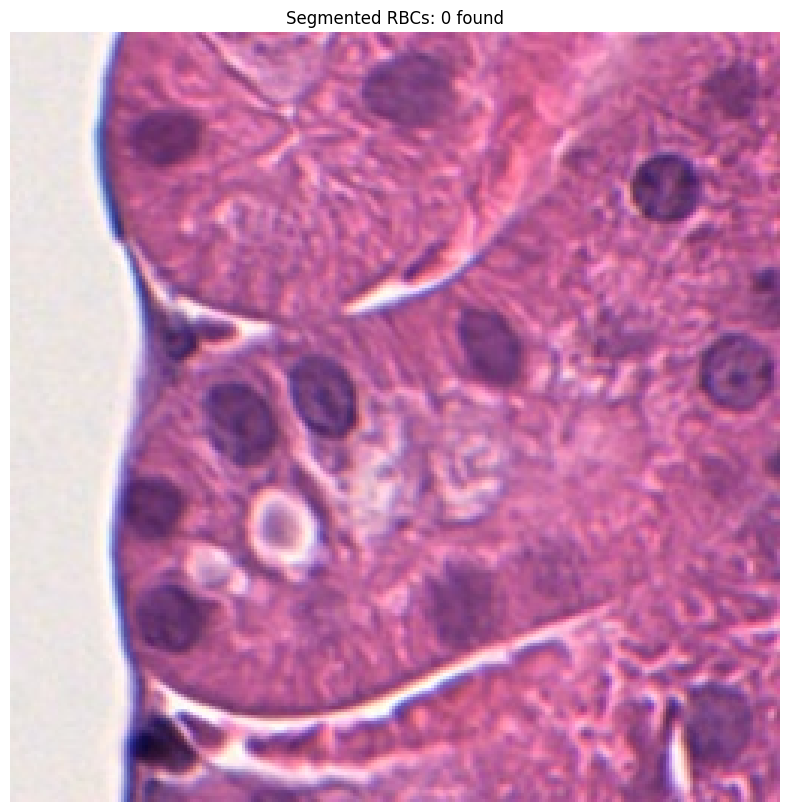

In [24]:
masks = get_rbc_regions(img)
print(masks)
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare the mask for visualization
# Background (0) should be transparent, so we convert to float and set 0 to NaN
vis_masks = masks.astype(float)
vis_masks[vis_masks == 0] = np.nan

# 2. Create the Plot
plt.figure(figsize=(10, 10))

# Display original image
plt.imshow(img)

# Overlay the masks
# 'prism' or 'jet' gives each individual RBC a unique color
plt.imshow(vis_masks, cmap='prism', alpha=0.5) 

plt.title(f"Segmented RBCs: {len(np.unique(masks))-1} found")
plt.axis('off')
plt.show()